In [3]:
# pip install python_speech_features

  Stored in directory: /home/ec2-user/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features
Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa

In [95]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=3, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(3):
        for y in range(5):
            try:
                axes[x,y].set_title(list(signals.keys())[i])
                axes[x,y].plot(list(signals.values())[i])
                axes[x,y].get_xaxis().set_visible(False)
                axes[x,y].get_yaxis().set_visible(False)
                i += 1
            except IndexError:
                pass

def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=3, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for x in range(3):
        for y in range(5):
            try:
                axes[x,y].set_title(list(mfccs.keys())[i])
                axes[x,y].imshow(list(mfccs.values())[i],
                        cmap='hot', interpolation='nearest')
                axes[x,y].get_xaxis().set_visible(False)
                axes[x,y].get_yaxis().set_visible(False)
                i += 1
            except IndexError:
                pass

In [17]:
train = pd.read_csv('train.csv')
train.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


In [21]:
path = 'audio_train/'
def get_length(row):
    sig, fs = librosa.load(path + row)
    length = sig.shape[0]/fs
    return length

In [22]:
train['length'] = train['fname'].map(get_length)

In [24]:
train.head()

,fname,label,manually_verified,length
0,00044347.wav,Hi-hat,0,14.00
1,001ca53d.wav,Saxophone,1,10.32
2,002d256b.wav,Trumpet,0,0.44
3,0033e230.wav,Glockenspiel,1,8.00
4,00353774.wav,Cello,1,4.52


In [30]:
train.groupby('label').agg({"length":"mean"})

,length
label,
Acoustic_guitar,10.430200
Applause,11.632867
Bark,11.196485
Bass_drum,2.569667
Burping_or_eructation,3.353810
Bus,15.634862
Cello,7.453267
Chime,12.405391
Clarinet,6.947467


In [32]:
classes = list(np.unique(train.label))
classes

['Acoustic_guitar',
 'Applause',
 'Bark',
 'Bass_drum',
 'Burping_or_eructation',
 'Bus',
 'Cello',
 'Chime',
 'Clarinet',
 'Computer_keyboard',
 'Cough',
 'Cowbell',
 'Double_bass',
 'Drawer_open_or_close',
 'Electric_piano',
 'Fart',
 'Finger_snapping',
 'Fireworks',
 'Flute',
 'Glockenspiel',
 'Gong',
 'Gunshot_or_gunfire',
 'Harmonica',
 'Hi-hat',
 'Keys_jangling',
 'Knock',
 'Laughter',
 'Meow',
 'Microwave_oven',
 'Oboe',
 'Saxophone',
 'Scissors',
 'Shatter',
 'Snare_drum',
 'Squeak',
 'Tambourine',
 'Tearing',
 'Telephone',
 'Trumpet',
 'Violin_or_fiddle',
 'Writing']

In [52]:
#nfft = 44100/40 which is about 1103
# how many points is going to fall into fft
singals = {}
mfccs = {}
for c in classes:
    wav_file = train[train.label == c].iloc[0,0]
    sig, sr = librosa.load(path + wav_file)
    singals[c] = sig
    mel =mfcc(sig[:sr], sr, numcep=13, nfilt=26, nfft=1103).T
    mfccs[c] = mel

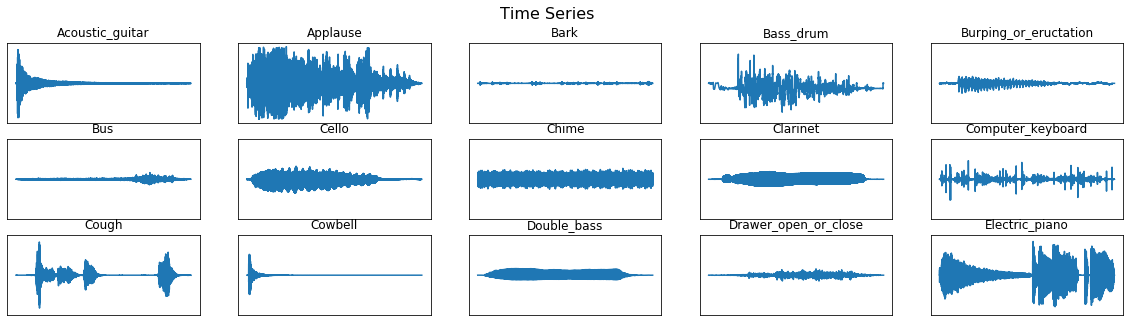

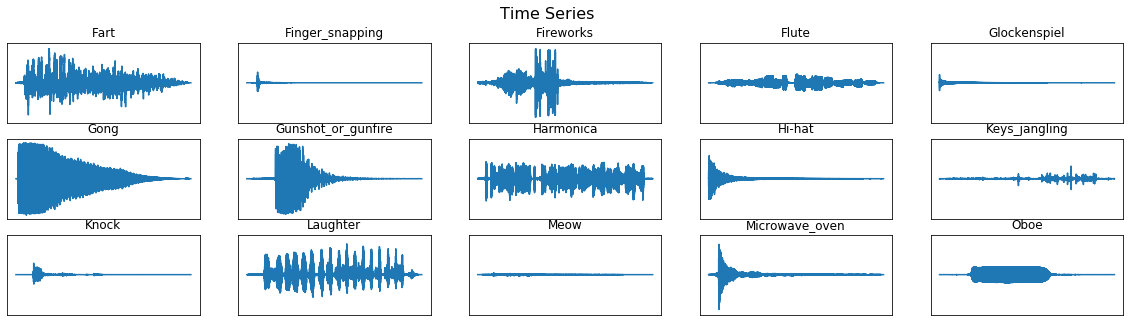

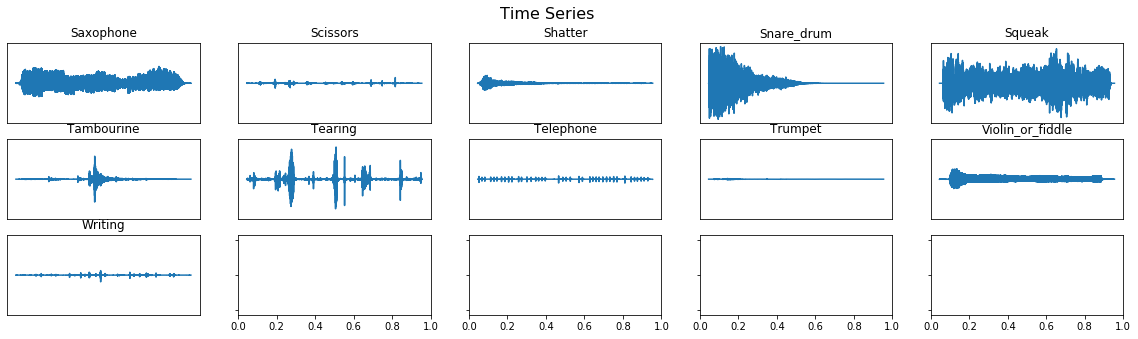

In [107]:
slices = 0
for i in range(3):
    S = {k: singals[k] for k in list(singals)[slices:slices+15]}
    plot_signals(S)
    plt.show()
    slices = slices + 15

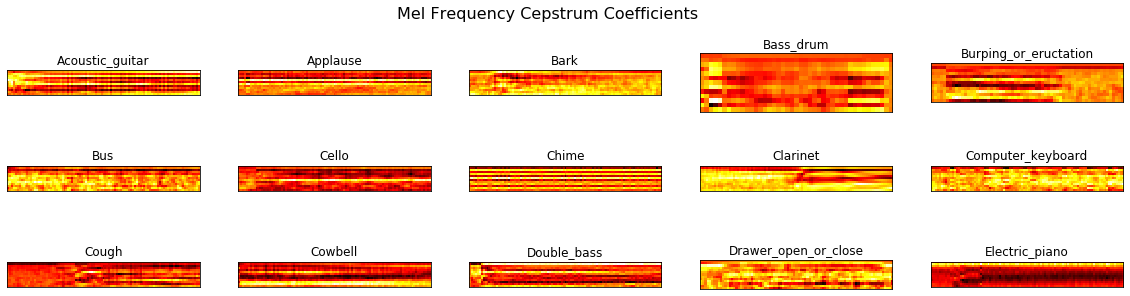

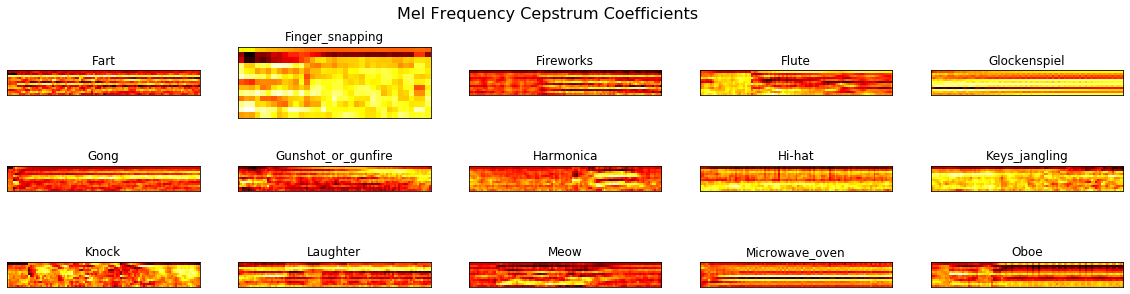

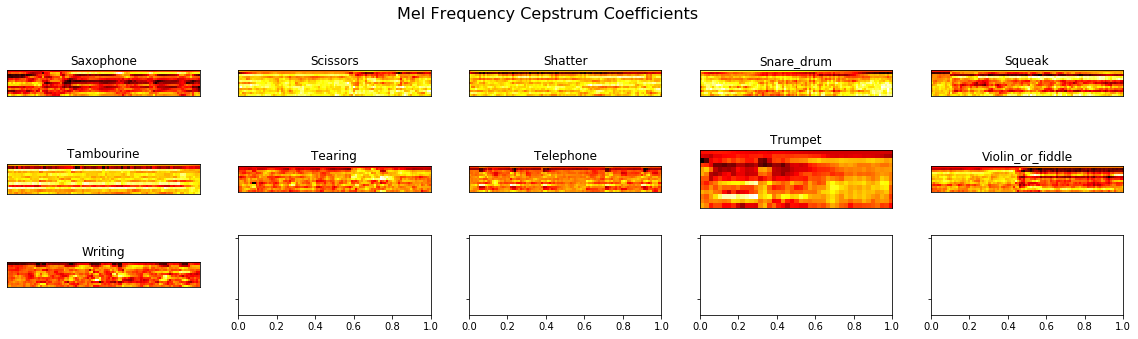

In [109]:
slices = 0
for i in range(3):
    S = {k: mfccs[k] for k in list(mfccs)[slices:slices+15]}
    plot_mfccs(S)
    plt.show()
    slices = slices + 15

In [99]:
# def envelope(y, rate, threshold):
#     mask = []
#     y = pd.Series(y).apply(np.abs)
#     y_mean = y.rolling(window=int(rate/10),min_periods=1, center=True).mean()
#     for mean in y_mean:
#         if mean > threshold:
#             mask.append(True)
#         else:
#             mask.append(False)
#     return mask

In [100]:
# singals_cleaned = {}
# for c in classes:
#     wav_file = train[train.label == c].iloc[0,0]
#     sig, sr = librosa.load(path + wav_file)
#     mask = envelope(sig, sr, 0.0005)
#     singals_cleaned[c] = sig[mask]

In [111]:
# slices = 0
# for i in range(3):
#     S = {k: singals_cleaned[k] for k in list(singals_cleaned)[slices:slices+15]}
#     plot_signals(S)
#     plt.show()
#     slices = slices + 15